In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

### load_digits() dataset from sklearn

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.data)
print(len(digits.data))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
1797


In [5]:
print(digits.target)
print(len(digits.target))

[0 1 2 ... 8 9 8]
1797


<Figure size 640x480 with 0 Axes>

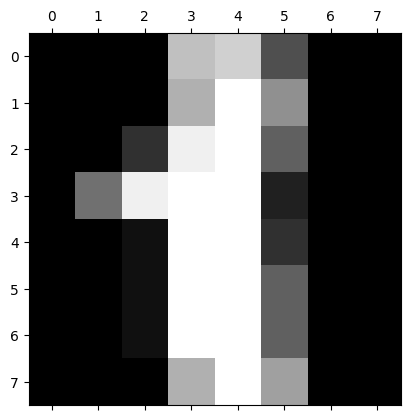

In [6]:
plt.gray()
plt.matshow(digits.images[1])
plt.show()

### MLP class with option to use Dropout and Batch normalization

In [64]:
class MLP(torch.nn.Module):
    def __init__(self, layers_count, layers_sizes, activations, dropout_in_layers=None, batchNorm=None):
        # dropout_in_layer = [p1, p2, p3, ...]
        # batchNorm = [True, False, True, ...]

        super().__init__()
        self.layers_count = layers_count
        self.layers_sizes = layers_sizes
        self.activations = activations
        self.dropout_in_layers = dropout_in_layers
        self.batchNorm = batchNorm
        self.layers = torch.nn.Sequential()

        for i in range(self.layers_count - 1):
            layer = torch.nn.Linear(in_features=self.layers_sizes[i], out_features=self.layers_sizes[i+1])
            self.layers.append(layer)
            self.layers.append(self.activations[i])
            if (self.batchNorm):
                if (self.batchNorm[i]):
                    self.layers.append(torch.nn.BatchNorm1d(self.layers_sizes[i+1]))
            if (self.dropout_in_layers):
                if (self.dropout_in_layers[i]):
                    torch.nn.Dropout(p=dropout_in_layers[i])


    def forward(self, x):
        return self.layers(x)
    

In [20]:
class DigitsDataset(Dataset):
    def __init__(self, X, labels):
        # convert into Pytorch tensors
        self.X = torch.from_numpy(X).to(dtype=torch.float32)
        self.labels = torch.from_numpy(labels).to(dtype=torch.float32)

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        # return super().__getitem__(index)
        return (self.X[index], self.labels[index])


In [18]:
X = digits.data
y = digits.target

print(X)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


### Testing MLP class using load_digits() dataset from sklearn

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
torch.manual_seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

digits_data_training = DigitsDataset(X_train, y_train)
digits_data_testing = DigitsDataset(X_test, y_test)

train_loader = DataLoader(digits_data_testing, batch_size=16, shuffle=True)
test_loader = DataLoader(digits_data_testing, batch_size=16)


#### MLP with Dropout and BatchNorm

In [65]:
# Model initializing
mlp = MLP(
    4, 
    [64, 32, 16, 10], 
    [torch.nn.ReLU(), torch.nn.ReLU(), torch.nn.Softmax(dim=1)],
    dropout_in_layers=[0.2, 0.2, None],
    batchNorm=[True, True, True] 
)

loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

In [66]:
n = len(train_loader)

# Train loop
for epoch in range(0, 25):
    print(f'\nStarting Epoch {epoch + 1}')

    current_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()

        outputs = mlp(images)
        loss = loss_function(outputs, labels.long())
        loss.backward()
        optimizer.step()  # update the values

        current_loss += loss.item()

    loss_after_epoch = current_loss / n
    print(f"Epoch {epoch + 1} - Training loss: {loss_after_epoch}")

print("\nTraining has completed")


Starting Epoch 1
Epoch 1 - Training loss: 2.1651563274449317

Starting Epoch 2
Epoch 2 - Training loss: 1.3899903955130741

Starting Epoch 3
Epoch 3 - Training loss: 1.1282913191565151

Starting Epoch 4
Epoch 4 - Training loss: 0.9460794925689697

Starting Epoch 5
Epoch 5 - Training loss: 0.905709577017817

Starting Epoch 6
Epoch 6 - Training loss: 0.893536541996331

Starting Epoch 7
Epoch 7 - Training loss: 0.8000829302031418

Starting Epoch 8
Epoch 8 - Training loss: 0.8066649683590593

Starting Epoch 9
Epoch 9 - Training loss: 0.7367044985294342

Starting Epoch 10
Epoch 10 - Training loss: 0.6886012173932174

Starting Epoch 11
Epoch 11 - Training loss: 0.729349267893824

Starting Epoch 12
Epoch 12 - Training loss: 0.6376977994524199

Starting Epoch 13
Epoch 13 - Training loss: 0.6471770272172731

Starting Epoch 14
Epoch 14 - Training loss: 0.6931796063636911

Starting Epoch 15
Epoch 15 - Training loss: 0.644521578632552

Starting Epoch 16
Epoch 16 - Training loss: 0.672138931422398